### Problem

Select $n$ points on a circle independently according to a uniform distribution. What is the probability that all of them lie on the same semicircle?

Hint: Think before you calculate.

### Solution

The key observation to make here is that the $n$ points all lie on the same semi-circle, an event we denote $E$, if and only they all lie in one of the $n$ semi-circles $S_i^{+}$, $i\in\{1,\dots,n\}$, that "start" at one of the $n$ points, and extend out $\pi$ radians counterclockwise.

We will prove that this is in just a bit.  For now, assume it is true.

First, let $E_i$ denote the event that all points are in $S_i$, so that we have
\begin{equation}
P(E)=P(E_1\cup\dots\cup E_n).
\end{equation}

Note that for $i\neq j$, $E_i\cap E_j=\emptyset$, and hence
\begin{equation}
P(E_1\cup\dots\cup E_n)=\sum_{i=1}^{n}P(E_i).
\end{equation}

Because of symmetry, $P(E_i)=P(E_j)$ for all $i,j$, so the above expression simplifies further to
\begin{equation}
P(E_1\cup\dots\cup E_n)=nP(E_i), \quad \text{true for any } i.
\end{equation}

Hence, it is enough to compute $P(E_i)$.  But this is simple.  For any point $j\neq i$, note that because of symmetry,
\begin{equation}
P(j\in S_i^{+})=P(j\in S_i^{-})=\frac{1}{2},
\end{equation}
where $S_i^{-}$ is the circle "starting" at point $i$, but extending out *clockwise* $\pi$ radians.

Because the points are independent, then probability that all the $n-1$ points that are not $i$ are in $S^{+}_i$ is $\frac{1}{2^{n-1}}$, and hence
\begin{equation}
P(E_i)=\frac{1}{2^{n-1}}.
\end{equation}

Plugging this back into the equation above, we get
\begin{equation}
P(E_1\cup\dots\cup E_n)=n\frac{1}{2^{n-1}},
\end{equation}
and thus we arrive at our result
\begin{equation}
\boxed{P(E)=n\frac{1}{2^{n-1}}}.
\end{equation}

It remains to show that $P(E)=P(E_1\cup\dots\cup E_n)$.

=>) Suppose the event $E$ has occurred, i.e., all points lie on some semi-circle $S$.  If we orient $S$ "counterclockwise", then we can identify its "leading" point $i_1\in\{1,\dots,n\}$ as the unique point such that for all $i_2\in\{1,\dots,n\}$,
\begin{gather}
\exists\;\theta_{1,2}\in[0,\pi] \text{ such that}\\
i_2=i_1+\theta_{i,2}.
\end{gather}

Informally, this means that we can get to any point $i_2$ by first starting at $i_1$, and then moving counterlockwise anywhere from 0 to $\pi$ to radians.

But that means that event $E_{i_1}$ has occurred, and hence the event $E_1\cup\dots\cup E_n$ has occurred.  Hence, $E_1\cup\dots\cup E_n\subseteq E$.

<=) Now suppose $E_1\cap\dots\cap E_n$ has occurred.  Then for some $i\in\{1,\dots,n\}$, all the points lie in the semi-circle $S_i^{+}$.  Because all the points lie on a semi-circle (e.g. $S_i^{+}$), the event $E$ has occurred.  In other words $E\subseteq E_1\cup\dots\cup E_n$.

Combining the two results above, we can conclude that $E=E_1\cup\dots\cup E_n$, which in particular implies $P(E)=P(E_1\cup\dots\cup E_n)$.  This finishes our proof. $\square$

### Code

In [24]:
from scipy.stats import uniform
from math import pi
import numpy as np

### Empirical vs theoretical probability

In [25]:
# number of points
n = 8
num_experiments = int(1e04)
p = 0
for experiment in range(num_experiments):
    # generate random points
    points = 2*pi*uniform.rvs(size=n)
    # check $n$ relevant semi circles
    for point1 in points:
        # semi circle "doesn't overshoot"
        if point1+pi<2*pi:     
            res = [int(point2>=point1 and point1+pi>=point2) for point2 in points]
        # semi circle overshoots
        else:
            res = [int(point2>=point1) or int(point2<=pi-(2*pi-point1)) for point2 in points]
        if sum(res)==n:
            p += 1/num_experiments
            break
print("Empiricaly probability = {0}".format(round(p,5)))
pth = n/(2**(n-1))
print("Theoretical probability = {0}".format(round(pth,5)))

Empiricaly probability = 0.0646
Theoretical probability = 0.0625


### Visualized sampled points on the circle

In [26]:
from matplotlib import pyplot as plt

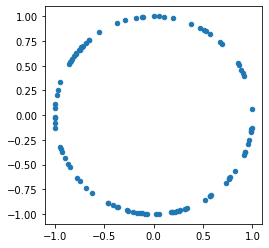

In [27]:
# plot circle
plt.clf()
n = 100
points = 2*pi*uniform.rvs(size=n)
# print(points)
x = np.cos(points)
y = np.sin(points)
plt.scatter(x, y, s=20)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Visualize empirical cdf

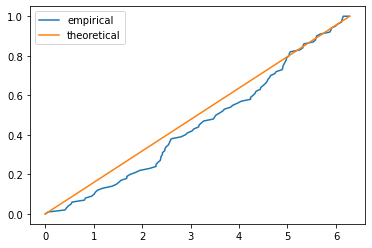

In [28]:
# plot corresponding points
plt.clf()
# empirical; i.e. samples
points.sort()
raw = {point: (i+1)/n for i,point in enumerate(points)}
plt.plot([0]+list(raw.keys())+[2*pi],
         [0]+list(raw.values())+[1], label='empirical')
# theoretical
x = np.linspace(0, 2*pi, num=2, endpoint=True)
y = np.linspace(0, 1, num=2, endpoint=True)
plt.plot(x, y, label='theoretical')
plt.legend()
plt.show()